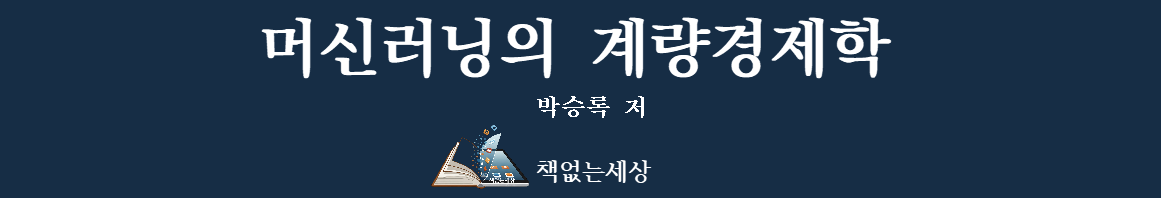

# Part 4: 계량경제학적 평가 주제

## Chapter 6: 연립방정식 모형

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("X:\Econometrics_with_ML")
os.getcwd()

'E:\\JupyterWDirectory\\MyStock'

In [2]:
# exec(open('Functions/Traditional_Econometrics_Lib.py').read())

In [ ]:
# 전통적 계량경제학에서 자주 사용되는 라이브러리(Libraries for the Analysis of Traditional Econometrics)
# Call this file 
# "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# "%run –i Functions/Traditional_Econometrics_Lib.py"
# "from Functions.Traditional_Econometrics_Lib import * "
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random
from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model
import wooldridge as woo
import wbdata
import warnings
warnings.filterwarnings("ignore")

# Korean Fonts
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

#### 3) 도구 변수(대변수, instrumental variables) 추정법

In [3]:

import wooldridge as woo
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf

mroz = woo.dataWoo('mroz')

# lwage 기준 nan 제거
mroz = mroz.dropna(subset=['lwage'])

# 1) IV추정법의 이해
cov_yz = np.cov(mroz['lwage'], mroz['fatheduc'])[1, 0]
cov_xy = np.cov(mroz['educ'], mroz['lwage'])[1, 0]
cov_xz = np.cov(mroz['educ'], mroz['fatheduc'])[1, 0]
var_x = np.var(mroz['educ'], ddof=1)
x_bar = np.mean(mroz['educ'])
y_bar = np.mean(mroz['lwage'])

# OLS추정치
b_ols_man = cov_xy / var_x
print(f'b_ols_man: {b_ols_man}\n')

# IV 추정치
b_iv_man = cov_yz / cov_xz
print(f'b_iv_man: {b_iv_man}\n')

# 2) 명령어를 이용한 OLS와 IV
# 명령어를 이용한 OLS 
reg_ols = smf.ols(formula='lwage ~ educ', data=mroz)
results_ols = reg_ols.fit()
print(results_ols.summary())

# 명령어를 이용한 IV 추정
reg_iv = iv.IV2SLS.from_formula(formula='lwage ~ 1 + [educ ~ fatheduc]',
                                data=mroz)
results_iv = reg_iv.fit(cov_type='unadjusted', debiased=True)
print(results_iv)

b_ols_man: 0.10864865517467516

b_iv_man: 0.05917347999936596

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     56.93
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           2.76e-13
Time:                        11:30:17   Log-Likelihood:                -441.26
No. Observations:                 428   AIC:                             886.5
Df Residuals:                     426   BIC:                             894.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

A data.frame with 753 observations on 22 variables:
* inlf: =1 if in lab frce, 1975
* hours: hours worked, 1975
* kidslt6: # kids < 6 years
* kidsge6: # kids 6-18
* age: woman’s age in yrs
* educ: years of schooling
* wage: est. wage from earn, hrs
* repwage: rep. wage at interview in 1976
* hushrs: hours worked by husband, 1975
* husage: husband’s age
* huseduc: husband’s years of schooling
* huswage: husband’s hourly wage, 1975
* faminc: family income, 1975
* mtr: fed. marg. tax rte facing woman
* motheduc: mother’s years of schooling
* fatheduc: father’s years of schooling
* unem: unem. rate in county of resid.
* city: =1 if live in SMSA
* exper: actual labor mkt exper
* nwifeinc: (faminc - wage*hours)/1000
* lwage: log(wage)
* expersq: exper^2


In [6]:
import wooldridge as woo
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf

mroz = woo.dataWoo('mroz')

# lwage 기준 nan 제거
mroz = mroz.dropna(subset=['lwage'])

# 1) IV추정법의 이해
cov_yz = np.cov(mroz['lwage'], mroz['fatheduc'])[1, 0]
cov_xy = np.cov(mroz['educ'], mroz['lwage'])[1, 0]
cov_xz = np.cov(mroz['educ'], mroz['fatheduc'])[1, 0]
var_x = np.var(mroz['educ'], ddof=1)
x_bar = np.mean(mroz['educ'])
y_bar = np.mean(mroz['lwage'])

# OLS추정치
b_ols_man = cov_xy / var_x
print(f'b_ols_man: {b_ols_man}\n')

# IV 추정치
b_iv_man = cov_yz / cov_xz
print(f'b_iv_man: {b_iv_man}\n')

# 2) 명령어를 이용한 OLS와 IV
# 명령어를 이용한 OLS 
reg_ols = smf.ols(formula='lwage ~ educ', data=mroz)
results_ols = reg_ols.fit()
print(results_ols.summary())

# 명령어를 이용한 IV 추정
reg_iv = iv.IV2SLS.from_formula(formula='lwage ~ 1 + [educ ~ fatheduc]',
                                data=mroz)
results_iv = reg_iv.fit(cov_type='unadjusted', debiased=True)
print(results_iv)

results_iv.durbin()
results_iv.wu_hausman()



b_ols_man: 0.10864865517467538

b_iv_man: 0.05917347999936596

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     56.93
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           2.76e-13
Time:                        11:41:29   Log-Likelihood:                -441.26
No. Observations:                 428   AIC:                             886.5
Df Residuals:                     426   BIC:                             894.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 2.4703
P-value: 0.1168
Distributed: F(1,425)
WaldTestStatistic, id: 0x1e5a730d330

A data.frame with 3010 observations on 34 variables:
* id: person identifier
* nearc2: =1 if near 2 yr college, 1966
* nearc4: =1 if near 4 yr college, 1966
* educ: years of schooling, 1976
* age: in years
* fatheduc: father’s schooling
* motheduc: mother’s schooling
* weight: NLS sampling weight, 1976
* momdad14: =1 if live with mom, dad at 14
* sinmom14: =1 if with single mom at 14
* step14: =1 if with step parent at 14
* reg661: =1 for region 1, 1966
* reg662: =1 for region 2, 1966
* reg663: =1 for region 3, 1966
* reg664: =1 for region 4, 1966
* reg665: =1 for region 5, 1966
* reg666: =1 for region 6, 1966
* reg667: =1 for region 7, 1966
* reg668: =1 for region 8, 1966
* reg669: =1 for region 9, 1966
* south66: =1 if in south in 1966
* black: =1 if black
* smsa: =1 in in SMSA, 1976
* south: =1 if in south, 1976
* smsa66: =1 if in SMSA, 1966
* wage: hourly wage in cents, 1976
* enroll: =1 if enrolled in school, 1976
* KWW: knowledge world of work score
* IQ: IQ score
* married: =1 if married, 1976
* libcrd14: =1 if lib. card in home at 14
* exper: age - educ - 6
* lwage: log(wage)
* expersq: exper^2


#### (보완) 유도형 모형의 추정

In [4]:
import wooldridge as woo
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf

card = woo.dataWoo('card')

# 유도형(reduced form) 모형 추정
# 교육년수
formula_educ = """educ ~ nearc4 + exper + I(exper**2) + black + smsa +
                  south + smsa66 + reg662 + reg663 + reg664 + reg665 + reg666 +
                  reg667 + reg668 + reg669"""
reg_educ = smf.ols(formula=formula_educ, data=card)
results_educ = reg_educ.fit()
display(results_educ.summary())

# 임금
formula_lwage = """lwage ~ educ + exper + I(exper**2) + black + smsa +
                   south + smsa66 + reg662 + reg663 + reg664 + reg665 +
                   reg666 + reg667 + reg668 + reg669"""
reg_lwage = smf.ols(formula=formula_lwage, data=card)
results_lwage = reg_lwage.fit()
display(results_lwage.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     182.1
Date:                Tue, 22 Jul 2025   Prob (F-statistic):               0.00
Time:                        11:36:12   Log-Likelihood:                -6258.5
No. Observations:                3010   AIC:                         1.255e+04
Df Residuals:                    2994   BIC:                         1.265e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.6383      0.241     69.145      0.000      16.166      17.110
nearc4            0.3199      0.088      3.641      0.000       0.148       0.492
exper            -0.4125      0.034    -12.241      0.000      -0.479      -0.346
I(exper ** 2)     0.0009      0.002      0.526      0.599      -0.002       0.004
black            -0.9355      0.094     -9.981      0.000      -1.119      -0.752
smsa              0.4022      0.105      3.837      0.000       0.197       0.608
south            -0.0516      0.135     -0.381      0.703      -0.317       0.214
smsa66            0.0255      0.106      0.241      0.810      -0.182       0.233
reg662           -0.0786      0.187     -0.420      0.674      -0.446       0.288
reg663           -0.0279      0.183     -0.152      0.879      -0.387       0.332
reg664            0.1172      0.217      0.539      0.590      -0.309       0.543
reg665           -0.2726      0.218     -1.248      0.212      -0.701       0.156
reg666           -0.3028      0.237     -1.277      0.202      -0.768       0.162
reg667           -0.2168      0.234     -0.925      0.355      -0.676       0.243
reg668            0.5239      0.267      1.959      0.050      -0.001       1.048
reg669            0.2103      0.202      1.039      0.299      -0.187       0.607
==============================================================================
Omnibus:                       15.758   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.971
Skew:                           0.177   Prob(JB):                     0.000340
Kurtosis:                       2.954   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     85.48
Date:                Tue, 22 Jul 2025   Prob (F-statistic):          1.74e-218
Time:                        11:36:12   Log-Likelihood:                -1288.8
No. Observations:                3010   AIC:                             2610.
Df Residuals:                    2994   BIC:                             2706.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.6208      0.074     62.248      0.000       4.475       4.766
educ              0.0747      0.003     21.351      0.000       0.068       0.082
exper             0.0848      0.007     12.806      0.000       0.072       0.098
I(exper ** 2)    -0.0023      0.000     -7.223      0.000      -0.003      -0.002
black            -0.1990      0.018    -10.906      0.000      -0.235      -0.163
smsa              0.1364      0.020      6.785      0.000       0.097       0.176
south            -0.1480      0.026     -5.695      0.000      -0.199      -0.097
smsa66            0.0262      0.019      1.349      0.177      -0.012       0.064
reg662            0.0964      0.036      2.684      0.007       0.026       0.167
reg663            0.1445      0.035      4.115      0.000       0.076       0.213
reg664            0.0551      0.042      1.322      0.186      -0.027       0.137
reg665            0.1280      0.042      3.060      0.002       0.046       0.210
reg666            0.1405      0.045      3.106      0.002       0.052       0.229
reg667            0.1180      0.045      2.633      0.008       0.030       0.206
reg668           -0.0564      0.051     -1.101      0.271      -0.157       0.044
reg669            0.1186      0.039      3.054      0.002       0.042       0.195
==============================================================================
Omnibus:                       59.717   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.222
Skew:                          -0.282   Prob(JB):                     3.42e-16
Kurtosis:                       3.501   Cond. No.                     1.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
# 대변수 추정법(IV)
formula_iv = """lwage ~ 1 + exper + I(exper**2) + black + smsa + 
                south + smsa66 + reg662 + reg663 + reg664 + reg665 +
                reg666 + reg667 + reg668 + reg669 + [educ ~ nearc4]"""
reg_iv = iv.IV2SLS.from_formula(formula=formula_iv, data=card)
results_iv = reg_iv.fit(cov_type='unadjusted', debiased=True)

display(results_iv)

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                      0.2382
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2343
No. Observations:                3010   F-statistic:                    51.008
Date:                Wed, Mar 06 2024   P-value (F-stat)                0.0000
Time:                        16:54:43   Distribution:               F(15,2994)
Cov. Estimator:            unadjusted                                         
                                                                              
                              Parameter Estimates                              
===============================================================================
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
Intercept       3.6662     0.9248     3.9641     0.0001      1.8528      5.4795
I(exper**2)    -0.0023     0.0003    -7.0014     0.0000     -0.0030     -0.0017
black          -0.1468     0.0539    -2.7231     0.0065     -0.2525     -0.0411
exper           0.1083     0.0237     4.5764     0.0000      0.0619      0.1547
reg662          0.1008     0.0377     2.6739     0.0075      0.0269      0.1747
reg663          0.1483     0.0368     4.0272     0.0001      0.0761      0.2204
reg664          0.0499     0.0437     1.1408     0.2541     -0.0359      0.1357
reg665          0.1463     0.0471     3.1079     0.0019      0.0540      0.2386
reg666          0.1629     0.0519     3.1382     0.0017      0.0611      0.2647
reg667          0.1346     0.0494     2.7240     0.0065      0.0377      0.2314
reg668         -0.0831     0.0593    -1.4002     0.1616     -0.1994      0.0333
reg669          0.1078     0.0418     2.5784     0.0100      0.0258      0.1898
smsa            0.1118     0.0317     3.5313     0.0004      0.0497      0.1739
smsa66          0.0185     0.0216     0.8576     0.3912     -0.0238      0.0609
south          -0.1447     0.0273    -5.3023     0.0000     -0.1982     -0.0912
educ            0.1315     0.0550     2.3926     0.0168      0.0237      0.2393
===============================================================================

Endogenous: educ
Instruments: nearc4
Unadjusted Covariance (Homoskedastic)
Debiased: True
IVResults, id: 0x1fbcadbbf10

### 다. 연립방정식 추정법

#### 1) 외견무관 회귀(Seemingly Unrelated Regression: SUR)

In [6]:
import linearmodels as lm
import statsmodels.api as sm
from linearmodels.datasets import fringe

#  데이터세트 불러오기 
print(fringe.DESCR)
data = fringe.load() 
data = data.dropna()
display(data.head())

# 방정식 정의(여러가지 방법 가능)
# 참조: https://bashtage.github.io/linearmodels/system/examples/formulas.html
labeled_formula = """
{benefits: hrbens ~ educ + exper + expersq + union + south + nrtheast + nrthcen + male}
{earnings: hrearn ~ educ + exper + expersq + nrtheast + married + male}
"""
# SUR모형 추정
Model_SUR = SUR.from_formula(labeled_formula, data)
Result_SUR = Model_SUR.fit(cov_type="unadjusted")
print(Result_SUR)


F. Vella (1993), "A Simple Estimator for Simultaneous Models with Censored
Endogenous Regressors," International Economic Review 34, 441-457.

annearn                  annual earnings, $
hrearn                   hourly earnings, $
exper                    years work experience
age                      age in years
depends                  number of dependents
married                  =1 if married
tenure                   years with current employer
educ                     years schooling
nrtheast                 =1 if live in northeast
nrthcen                  =1 if live in north central
south                    =1 if live in south
male                     =1 if male
white                    =1 if white
union                    =1 if union member
office                   =1 if office worker
annhrs                   annual hours worked
ind1                     =1 if industry == 1
ind2                     =1 if industry == 2
ind3                     =1 if industry == 3
ind4           

,annearn,hrearn,exper,age,depends,married,tenure,educ,nrtheast,nrthcen,...,annbens,hrbens,annhrssq,beratio,lannhrs,tenuresq,expersq,lannearn,peratio,vserat
0,15000.00,7.81,14,36,2,1,15.0,18,1,0,...,3381.41,1.76,3686400.0,0.225427,7.560081,225.00,196,9.615806,0.091187,0.093053
1,6500.00,5.00,7,23,0,0,8.0,10,0,0,...,0.00,0.00,1690000.0,0.000000,7.170120,64.00,49,8.779557,0.000000,0.000000
2,6908.99,2.35,22,38,3,1,0.5,6,0,0,...,0.00,0.00,8643600.0,0.000000,7.986165,0.25,484,8.840579,0.000000,0.000000
3,5512.50,4.50,2,18,0,0,0.5,12,0,0,...,0.00,0.00,1500625.0,0.000000,7.110696,0.25,4,8.614774,0.000000,0.000000
4,7800.00,3.75,19,35,0,0,2.0,12,0,0,...,0.00,0.00,4326400.0,0.000000,7.640123,4.00,361,8.961879,0.000000,0.000000


                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.6951
No. Equations.:                     2   McElroy's R-squared:                 0.2197
No. Observations:                 616   Judge's (OLS) R-squared:             0.1873
Date:                Tue, Jul 22 2025   Berndt's R-squared:                  0.3775
Time:                        11:41:02   Dhrymes's R-squared:                 0.6950
                                        Cov. Estimator:                  unadjusted
                                        Num. Constraints:                      None
                Equation: benefits, Dependent Variable: hrbens                
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
educ           0.0346     0.0050     6.8605     0.0000      0.0247      0.0445
exper       

#### 2) 3단 최소자승법

In [7]:
import linearmodels as lm
import statsmodels.api as sm
from linearmodels import IV2SLS, IV3SLS, SUR, IVSystemGMM
from linearmodels.datasets import mroz

# 데이터 읽어오기
data = mroz.load()
data = data[["hours", "educ", "age", "kidslt6", "nwifeinc", "lwage", "exper", "expersq"]]
data = data.dropna()

# 2단 최소자승법
# 근로 시간
hours = "hours ~ educ + age + kidslt6 + nwifeinc + [lwage ~ exper + expersq]"
hours_mod = IV2SLS.from_formula(hours, data)
hours_res = hours_mod.fit(cov_type="unadjusted")
print(hours_res)

# 임금
lwage = "lwage ~ educ + exper + expersq + [hours ~ age + kidslt6 + nwifeinc]"
lwage_mod = IV2SLS.from_formula(lwage, data)
lwage_res = lwage_mod.fit(cov_type="unadjusted")
print(lwage_res)

# 3단 최소자승법
equations = dict(hours=hours, lwage=lwage)
system_3sls = IV3SLS.from_formula(equations, data)
system_3sls_res = system_3sls.fit(method="ols", cov_type="unadjusted")
print(system_3sls_res)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  hours   R-squared:                      0.1903
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1807
No. Observations:                 428   F-statistic:                    399.30
Date:                Tue, Jul 22 2025   P-value (F-stat)                0.0000
Time:                        11:45:18   Distribution:                  chi2(5)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
educ          -99.299     48.997    -2.0266     0.0427     -195.33     -3.2666
age            19.429     6.2770     3.0952     0.00

#### 3) 시스템 GMM 추정법

In [8]:
# System GMM Estimation
equations = dict(
    hours="hours ~ educ + age + kidslt6 + nwifeinc + [lwage ~ exper + expersq]",
    lwage="lwage ~ educ + exper + expersq + [hours ~ age + kidslt6 + nwifeinc]",
                 )
system_gmm = IVSystemGMM.from_formula(equations, data, weight_type="unadjusted")
system_gmm_res = system_gmm.fit(cov_type="unadjusted")
print(system_gmm_res)

system_gmm = IVSystemGMM.from_formula(equations, data, weight_type="robust")
system_gmm_res = system_gmm.fit(cov_type="robust", iter_limit=100)
print("Number of iterations: " + str(system_gmm_res.iterations))
print(system_gmm_res)

                    System 2-Step System GMM Estimation Summary                    
Estimator:          2-Step System GMM   Overall R-squared:                   0.0121
No. Equations.:                     2   McElroy's R-squared:                 0.0871
No. Observations:                 428   Judge's (OLS) R-squared:            -2.7776
Date:                Tue, Jul 22 2025   Berndt's R-squared:                 -0.7268
Time:                        11:46:08   Dhrymes's R-squared:                 0.0121
                                        Cov. Estimator:                  unadjusted
                                        Num. Constraints:                      None
                  Equation: hours, Dependent Variable: hours                  
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
educ          -109.89     48.038    -2.2876     0.0222     -204.05     -15.741
age         

#### 4) 완전정보 최우법 

In [9]:
import pandas as pd
import wooldridge as woo
from semopy import Model

# 데이터 불러오기
mroz = woo.dataWoo('mroz')

# 변수 선택 및 결측치 제거
mroz = mroz[['hours', 'lwage', 'educ', 'age', 'kidslt6', 'nwifeinc', 'exper']]
mroz['expersq'] = mroz['exper'] ** 2
mroz = mroz.dropna()

# 구조방정식 모형 정의
desc = """

# 구조방정식
hours ~ educ + age + kidslt6 + nwifeinc + lwage
lwage ~ educ + exper + expersq + hours

# 오차항 공분산 (필수)
hours ~~ hours
lwage ~~ lwage
"""
# 모형 정의 및 추정
model = Model(desc)
model.fit(mroz)  

# 추정 결과 출력
print(model.inspect())

     lval  op      rval       Estimate      Std. Err    z-value       p-value
0   hours   ~      educ      -2.315919     22.020407  -0.105171  9.162397e-01
1   hours   ~       age       6.810581      3.839148   1.773982  7.606605e-02
2   hours   ~   kidslt6      -1.408530     72.631875  -0.019393  9.845278e-01
3   hours   ~  nwifeinc      -6.295034      2.664411  -2.362637  1.814546e-02
4   hours   ~     lwage       0.339314    161.559386   0.002100  9.983242e-01
5   lwage   ~      educ       0.106209      0.014311   7.421749  1.156852e-13
6   lwage   ~     exper       0.044719      0.013091   3.416019  6.354384e-04
7   lwage   ~   expersq      -0.000859      0.000391  -2.194323  2.821220e-02
8   lwage   ~     hours      -0.000057      0.000239  -0.237714  8.121030e-01
9   hours  ~~     hours  300596.999978  21276.580297  14.128069  0.000000e+00
10  lwage  ~~     lwage       0.438233      0.029957  14.628698  0.000000e+00


# [보완] 한국의 거시모형

In [10]:
# 한국의 거시경제 통계자료 불러오기
# 통계 업데이트 : ecos.bok.or.kr/#/Short/af4c9c
data = pd.read_csv('E:/JupyterWDirectory/MyStock/Data/Korea_GDP.csv',index_col='Time', parse_dates=True)

new_index = pd.date_range(start='1961-03-31', periods=len(data), freq='Q')
data.index = pd.to_datetime(new_index)
data.index


DatetimeIndex(['1961-03-31', '1961-06-30', '1961-09-30', '1961-12-31',
               '1962-03-31', '1962-06-30', '1962-09-30', '1962-12-31',
               '1963-03-31', '1963-06-30',
               ...
               '2021-09-30', '2021-12-31', '2022-03-31', '2022-06-30',
               '2022-09-30', '2022-12-31', '2023-03-31', '2023-06-30',
               '2023-09-30', '2023-12-31'],
              dtype='datetime64[ns]', length=252, freq='Q-DEC')

In [11]:
df = data[['con', 'inv', 'gdp', 'gov', 'm2', 'rat']].loc['1995-06-30':]

In [12]:
# 차분변수(difference variables)
df['Diff_gdp'] = df['gdp'].diff(1)
df['Diff_m2'] = df['m2'].diff(1)

# 시차변수(lag variables)
df['gdp_L1'] = df['gdp'].shift(1)
df['con_L1'] = df['con'].shift(1)
df['rat_L1'] = df['rat'].shift(1)
df = df.dropna()
display(df)

,con,inv,gdp,gov,m2,rat,Diff_gdp,Diff_m2,gdp_L1,con_L1,rat_L1
1995-09-30,103064.2,71677.3,173299.7,23670.1,345159.9,13.4,2865.2,17512.5,170434.5,102560.7,14.7
1995-12-31,111567.7,70292.5,183328.4,25493.6,370600.4,11.9,10028.7,25440.5,173299.7,103064.2,13.4
1996-03-31,114000.5,59812.5,169643.1,25863.4,383578.2,12.0,-13685.3,12977.8,183328.4,111567.7,11.9
1996-06-30,110633.5,77633.1,184170.7,24261.0,399394.8,11.2,14527.6,15816.6,169643.1,114000.5,12.0
1996-09-30,110325.6,80970.5,186973.7,25206.6,415293.8,12.1,2803.0,15899.0,184170.7,110633.5,11.2
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,235677.7,159480.4,513770.2,89949.2,3758235.5,3.9,19615.6,10394.9,494154.6,232807.8,3.5
2023-03-31,233780.3,132942.8,472155.5,94700.5,3776930.1,3.5,-41614.7,18694.6,513770.2,235677.7,3.9
2023-06-30,229263.8,146189.8,497345.6,89060.8,3808194.2,3.4,25190.1,31264.1,472155.5,233780.3,3.5
2023-09-30,233387.8,148498.3,500997.0,82449.8,3839468.6,3.7,3651.4,31274.4,497345.6,229263.8,3.4


In [13]:
# 방정식 정의
EQ_con  = 'con ~ gdp + con_L1'
EQ_inv = 'inv ~ Diff_gdp + gdp_L1 + rat_L1'
EQ_rat = 'rat ~ gdp + Diff_gdp + Diff_m2 + rat_L1'
EQ_all = dict(con=EQ_con, inv=EQ_inv, rat=EQ_rat)

In [14]:
# 3단최소자승법
reg_3sls = IV3SLS.from_formula(EQ_all, data=df)
results_3sls = reg_3sls.fit(cov_type='unadjusted', debiased=True)
display(results_3sls)

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.9985
No. Equations.:                     3   McElroy's R-squared:                 0.9703
No. Observations:                 114   Judge's (OLS) R-squared:             0.9709
Date:                Tue, Jul 22 2025   Berndt's R-squared:                  0.9990
Time:                        11:51:01   Dhrymes's R-squared:                 0.9982
                                        Cov. Estimator:                  unadjusted
                                        Num. Constraints:                      None
                    Equation: con, Dependent Variable: con                    
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
gdp            0.0518     0.0150     3.4532     0.0008      0.0221      0.0814
con_L1         0.9022     0.0302     29.915     0.0000      0.8425      0.9620
                    Equation: inv, Dependent Variable: inv                    
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Diff_gdp       0.5234     0.0340     15.383     0.0000      0.4560      0.5908
gdp_L1         0.2969     0.0024     125.20     0.0000      0.2922      0.3016
rat_L1         811.33     138.12     5.8742     0.0000      537.64      1085.0
                    Equation: rat, Dependent Variable: rat                    
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
gdp         4.691e-07  4.571e-07     1.0263     0.3070  -4.367e-07   1.375e-06
Diff_gdp   -2.344e-07    3.8e-06    -0.0617     0.9509  -7.765e-06   7.296e-06
Diff_m2    -1.664e-06  3.752e-06    -0.4434     0.6583    -9.1e-06   5.772e-06
rat_L1         0.9576     0.0152     63.033     0.0000      0.9275      0.9877
==============================================================================

Covariance Estimator:
Homoskedastic (Unadjusted) Covariance (Debiased: True, GLS: True)
SystemResults, id: 0x2d59aa5e510

In [15]:
# System GMM Estimation
system_gmm = IVSystemGMM.from_formula(EQ_all, data=df, weight_type="unadjusted")
results_gmm = system_gmm.fit(cov_type="unadjusted")
display(results_gmm)

System 2-Step System GMM Estimation Summary                    
===================================================================================
Estimator:          2-Step System GMM   Overall R-squared:                   0.9985
No. Equations.:                     3   McElroy's R-squared:                 0.9702
No. Observations:                 114   Judge's (OLS) R-squared:             0.9709
Date:                Tue, Jul 22 2025   Berndt's R-squared:                  0.9990
Time:                        11:51:05   Dhrymes's R-squared:                 0.9982
                                        Cov. Estimator:                  unadjusted
                                        Num. Constraints:                      None
                    Equation: con, Dependent Variable: con                    
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
gdp            0.0501     0.0149     3.3692     0.0008      0.0210      0.0793
con_L1         0.9055     0.0299     30.241     0.0000      0.8468      0.9642
                    Equation: inv, Dependent Variable: inv                    
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Diff_gdp       0.5294     0.0339     15.640     0.0000      0.4631      0.5958
gdp_L1         0.2962     0.0023     126.30     0.0000      0.2916      0.3008
rat_L1         866.84     136.91     6.3313     0.0000      598.50      1135.2
                    Equation: rat, Dependent Variable: rat                    
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
gdp         4.812e-07  4.541e-07     1.0595     0.2894  -4.089e-07   1.371e-06
Diff_gdp   -6.234e-07  3.745e-06    -0.1665     0.8678  -7.963e-06   6.716e-06
Diff_m2    -1.354e-06  3.746e-06    -0.3614     0.7178  -8.695e-06   5.988e-06
rat_L1         0.9541     0.0150     63.815     0.0000      0.9248      0.9834
==============================================================================

Covariance Estimator:
GMM Homoskedastic (Unadjusted) Covariance
Weight Estimator:
Homoskedastic (Unadjusted) Weighting (Debiased: False, Center: False)
GMMSystemResults, id: 0x2d59aa5ca40

In [16]:
df_predict = results_gmm.predict(data=df, dataframe=True)
df_predict.columns = ['con_fit', 'inv_fit', 'rat_fit']
df_all = pd.concat([df, df_predict], axis=1)
display(df_all)

,con,inv,gdp,gov,m2,rat,Diff_gdp,Diff_m2,gdp_L1,con_L1,rat_L1,con_fit,inv_fit,rat_fit
1995-09-30,103064.2,71677.3,173299.7,23670.1,345159.9,13.4,2865.2,17512.5,170434.5,102560.7,14.7,101557.369845,64749.589643,14.083671
1995-12-31,111567.7,70292.5,183328.4,25493.6,370600.4,11.9,10028.7,25440.5,173299.7,103064.2,13.4,102516.026016,68264.113154,12.832923
1996-03-31,114000.5,59812.5,169643.1,25863.4,383578.2,12.0,-13685.3,12977.8,183328.4,111567.7,11.9,109530.018537,57379.707646,11.426791
1996-06-30,110633.5,77633.1,184170.7,24261.0,399394.8,11.2,14527.6,15816.6,169643.1,114000.5,12.0,112461.206196,68349.175334,11.507763
1996-09-30,110325.6,80970.5,186973.7,25206.6,415293.8,12.1,2803.0,15899.0,184170.7,110633.5,11.2,109552.857731,65751.963054,10.753002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,235677.7,159480.4,513770.2,89949.2,3758235.5,3.9,19615.6,10394.9,494154.6,232807.8,3.5,236565.258099,159809.094564,3.560380
2023-03-31,233780.3,132942.8,472155.5,94700.5,3776930.1,3.5,-41614.7,18694.6,513770.2,235677.7,3.9,237077.877144,133549.218216,3.948946
2023-06-30,229263.8,146189.8,497345.6,89060.8,3808194.2,3.4,25190.1,31264.1,472155.5,233780.3,3.5,236622.517081,156243.359767,3.520751
2023-09-30,233387.8,148498.3,500997.0,82449.8,3839468.6,3.7,3651.4,31274.4,497345.6,229263.8,3.4,232715.811603,152215.680250,3.440508


In [18]:
df_all['gdp_fit'] = df_all['con_fit']+df_all['inv_fit']+df_all['gov']
df_all.tail(50)

,con,inv,gdp,gov,m2,rat,Diff_gdp,Diff_m2,gdp_L1,con_L1,rat_L1,con_fit,inv_fit,rat_fit,gdp_fit
2011-09-30,185331.3,110241.5,368304.3,49998.3,1727997.3,3.6,-1807.2,34865.6,370111.5,183227.7,3.7,184377.769750,111893.516634,3.661443,346269.586384
2011-12-31,190010.4,117787.5,387387.0,53957.4,1751458.4,3.4,19082.7,23461.1,368304.3,185331.3,3.6,187239.206176,122331.352590,3.577626,363527.958766
2012-03-31,190394.7,105497.2,361724.2,57413.6,1782765.5,3.5,-25662.8,31307.1,387387.0,190010.4,3.4,190189.734293,104121.169348,3.391725,351724.503641
2012-06-30,184410.3,114752.6,379044.2,55041.7,1803812.4,3.4,17320.0,21046.9,361724.2,190394.7,3.5,191405.960351,119362.119725,3.482566,365809.780076
2012-09-30,189539.3,108747.3,376867.9,51809.6,1824002.8,2.9,-2176.3,20190.4,379044.2,184410.3,3.4,185877.915181,114084.299608,3.399419,351771.814789
2012-12-31,194495.1,110482.0,397100.3,56224.6,1835641.6,2.8,20232.4,11638.8,376867.9,189539.3,2.9,191536.522659,124870.164262,2.929693,372631.286921
2013-03-31,192822.2,98478.7,370014.0,59562.4,1868046.5,2.7,-27086.3,32404.9,397100.3,194495.1,2.8,194666.247180,105724.908183,2.822634,359953.555364
2013-06-30,187576.8,110412.2,390130.2,58310.6,1892905.6,2.7,20116.2,24859.1,370014.0,192822.2,2.7,194159.824167,122604.854123,2.717689,375075.278290
2013-09-30,192855.2,113368.7,390031.2,54085.4,1900172.3,2.9,-99.0,7266.7,390130.2,187576.8,2.7,189405.086106,117861.460978,2.754058,361351.947084
2013-12-31,198759.5,121651.0,412498.2,59077.5,1920795.0,2.9,22467.0,20622.7,390031.2,192855.2,2.9,195310.995843,129952.782150,2.923548,384341.277993


<Axes: title={'center': 'Consumption'}>

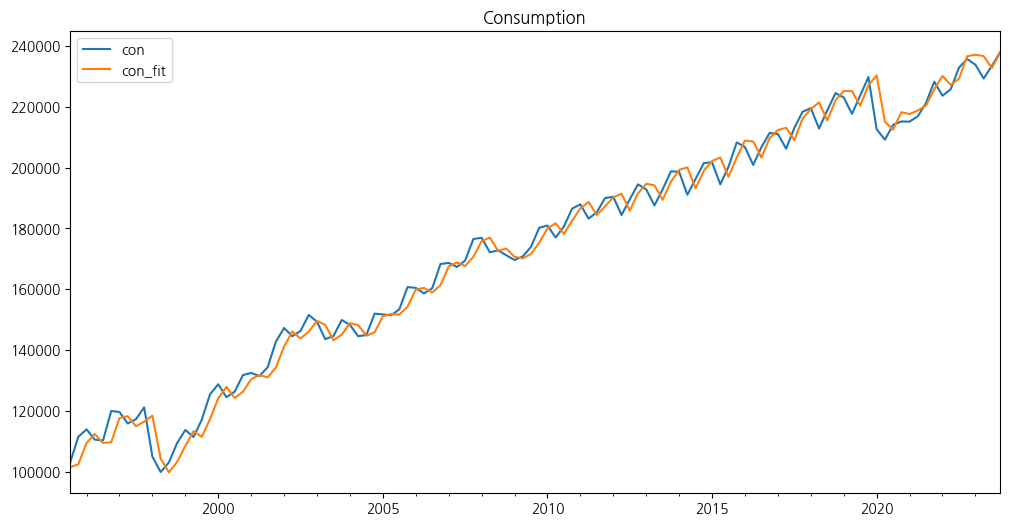

In [19]:
df_all['con'].plot(legend=True,figsize=(12,6),title='Consumption')
df_all['con_fit'].plot(legend=True,figsize=(12,6))

<Axes: title={'center': 'GDP'}>

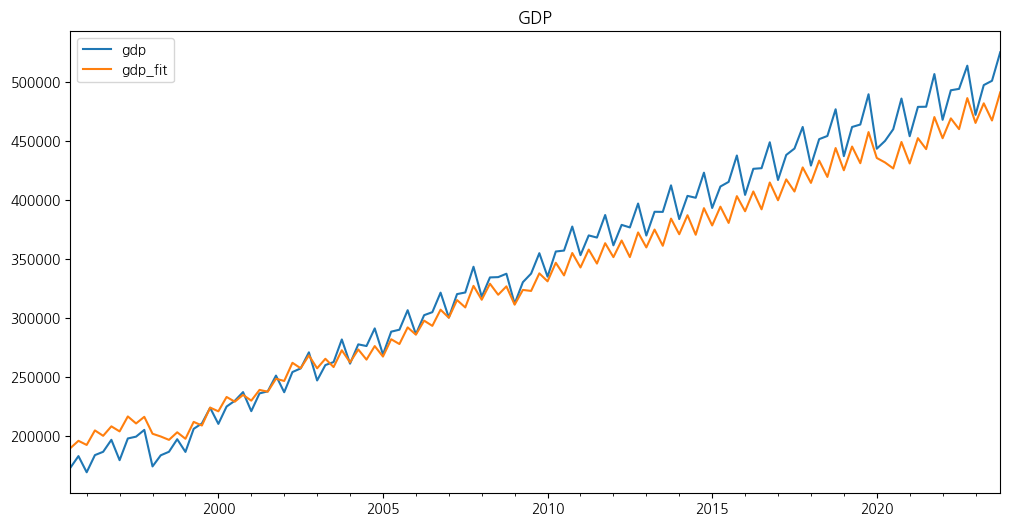

In [20]:
df_all['gdp'].plot(legend=True,figsize=(12,6),title='GDP')
df_all['gdp_fit'].plot(legend=True,figsize=(12,6))

<Axes: title={'center': 'Investment'}>

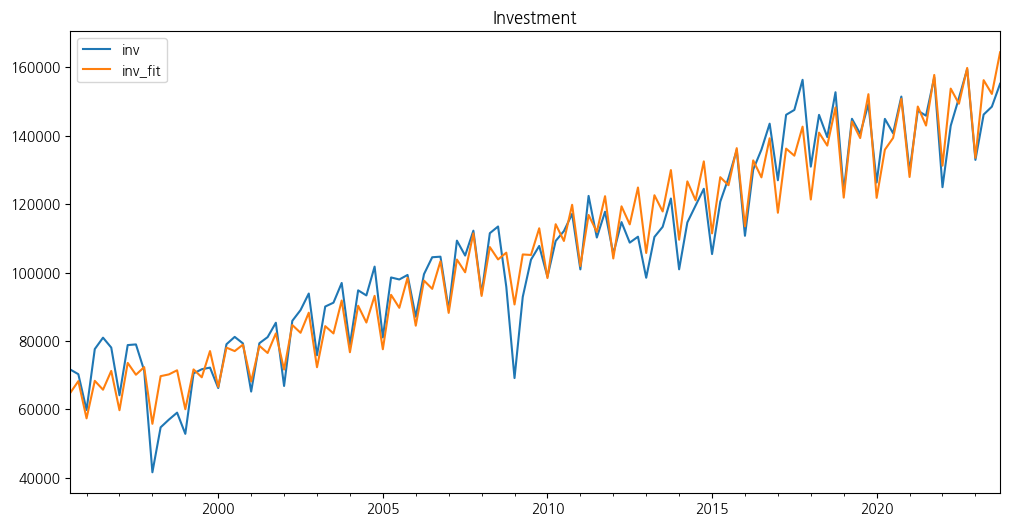

In [21]:
df_all['inv'].plot(legend=True,figsize=(12,6),title='Investment')
df_all['inv_fit'].plot(legend=True,figsize=(12,6))

<Axes: title={'center': 'Interest Rate'}>

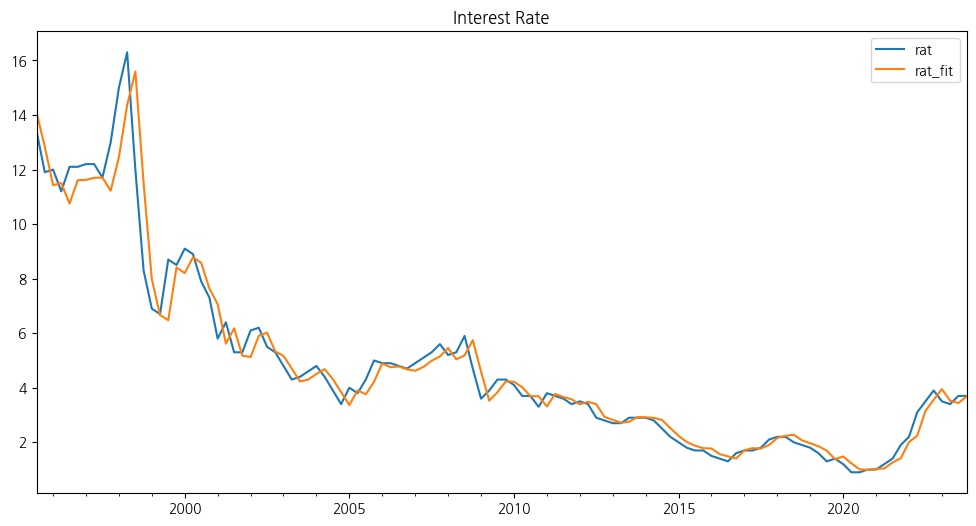

In [22]:
df_all['rat'].plot(legend=True,figsize=(12,6),title='Interest Rate')
df_all['rat_fit'].plot(legend=True,figsize=(12,6))